In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.impute
import sklearn.preprocessing
%matplotlib inline 
sns.set(style="ticks")

In [2]:
pd.set_option("display.width",70)

In [3]:
data = pd.read_csv("covid_19_clean_complete_2022.csv")

In [4]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
data.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [6]:
data.shape

(214894, 10)

In [7]:
data.isnull().sum()

Province/State    149189
Country/Region         0
Lat                 1546
Long                1546
Date                   0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
WHO Region          2319
dtype: int64

In [8]:
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
[(c, data[c].isnull().sum()) for c in hcols_with_na]
[(c, data[c].isnull().mean()) for c in hcols_with_na]

[('Province/State', 0.6942446043165468),
 ('Lat', 0.007194244604316547),
 ('Long', 0.007194244604316547),
 ('WHO Region', 0.01079136690647482)]

In [9]:
data_de=data.drop(["Province/State"],axis=1)

In [10]:
data_de.dtypes

Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [11]:
data_de.shape

(214894, 9)

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [13]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [14]:
def research_impute_numeric_column(dataset, num_column, const_value=None):
    strategy_params = ['mean', 'median', 'most_frequent', 'constant']
    strategy_params_names = ['Среднее', 'Медиана', 'Мода']
    strategy_params_names.append('Константа = ' + str(const_value))
    
    original_temp_data = dataset[[num_column]].values
    size = original_temp_data.shape[0]
    original_data = original_temp_data.reshape((size,))
    
    new_df = pd.DataFrame({'Исходные данные':original_data})
       
    for i in range(len(strategy_params)):
        strategy = strategy_params[i]
        col_name = strategy_params_names[i]
        if (strategy!='constant') or (strategy == 'constant' and const_value!=None):
            if strategy == 'constant':
                temp_data, _, _ = impute_column(dataset, num_column, strategy, fill_value_param=const_value)
            else:
                temp_data, _, _ = impute_column(dataset, num_column, strategy)
            new_df[col_name] = temp_data
        
    sns.kdeplot(data=new_df)

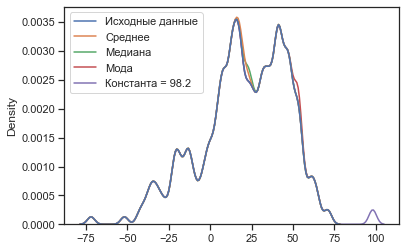

In [15]:
research_impute_numeric_column(data_de, "Lat", 98.2)

In [16]:
types =data_de["WHO Region"].dropna().astype(str)
types.value_counts()

Europe                   64159
Western Pacific          50245
Americas                 37104
Africa                   36331
Eastern Mediterranean    17006
South-East Asia           7730
Name: WHO Region, dtype: int64

In [17]:

from category_encoders.count import CountEncoder as ce_CountEncoder
from category_encoders.target_encoder import TargetEncoder as ce_TargetEncoder

In [18]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data_de[data_de.columns.difference(['Survived'])])
data_FREQ_ENC

,Active,Confirmed,Country/Region,Date,Deaths,Lat,Long,Recovered,WHO Region
0,0,0,0.003597,0.001294,0,33.939110,67.709953,0,0.079137
1,0,0,0.003597,0.001294,0,41.153300,20.168300,0,0.298561
2,0,0,0.003597,0.001294,0,28.033900,1.659600,0,0.169065
3,0,0,0.003597,0.001294,0,42.506300,1.521800,0,0.298561
4,0,0,0.003597,0.001294,0,-11.202700,17.873900,0,0.169065
...,...,...,...,...,...,...,...,...,...
214889,644414,649971,0.003597,0.001294,5557,31.952200,35.233200,0,0.079137
214890,530,530,0.003597,0.001294,0,39.904200,116.407400,0,0.010791
214891,9639,11774,0.003597,0.001294,2135,15.552727,48.516388,0,0.079137
214892,309655,313613,0.003597,0.001294,3958,-13.133897,27.849332,0,0.169065


In [19]:
data_FREQ_ENC['WHO Region'].unique()

array([0.07913669, 0.29856115, 0.16906475, 0.01079137, 0.17266187,
       0.23381295, 0.03597122])

<AxesSubplot:ylabel='Density'>

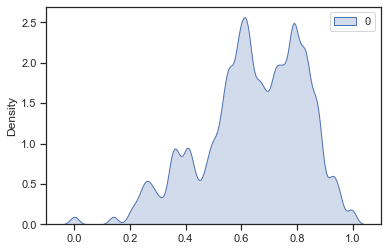

In [20]:
mm = sklearn.preprocessing.MinMaxScaler()
sns.kdeplot(data=mm.fit_transform(data_de[["Lat"]]),shade=True,color="g")

<AxesSubplot:ylabel='Density'>

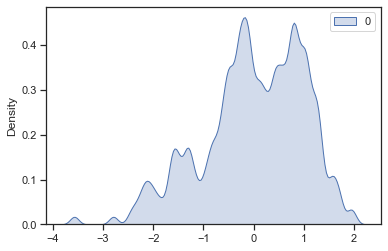

In [21]:
mm = sklearn.preprocessing.StandardScaler()
sns.kdeplot(data=mm.fit_transform(data_de[["Lat"]]),shade=True,color="g")

<AxesSubplot:ylabel='Density'>

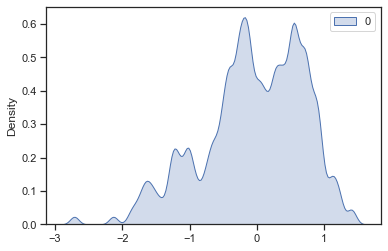

In [22]:
mm = sklearn.preprocessing.RobustScaler()
sns.kdeplot(data=mm.fit_transform(data_de[["Lat"]]),shade=True,color="g")

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [24]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

C:\Users\xia.beibei\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


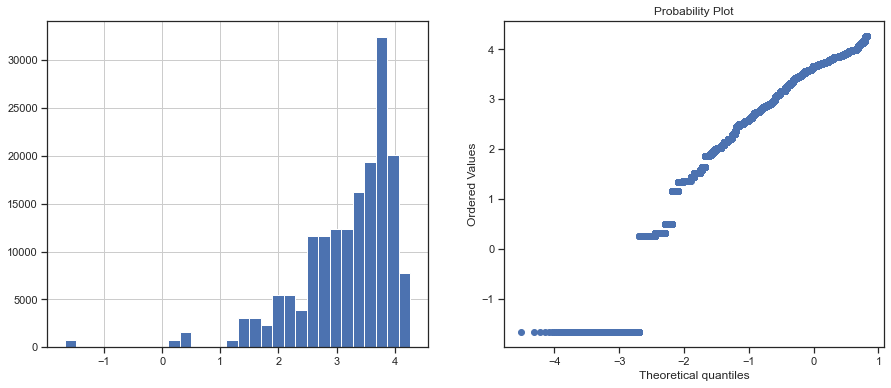

In [25]:
data_de['Lat'] = np.log(data_de['Lat'])
diagnostic_plots(data_de, 'Lat')

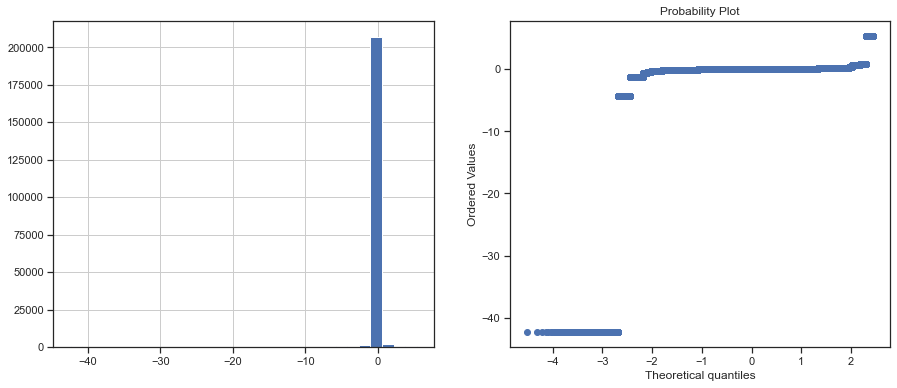

In [26]:
data['Lat'] = 1 / (data['Lat']) 
diagnostic_plots(data, 'Lat')

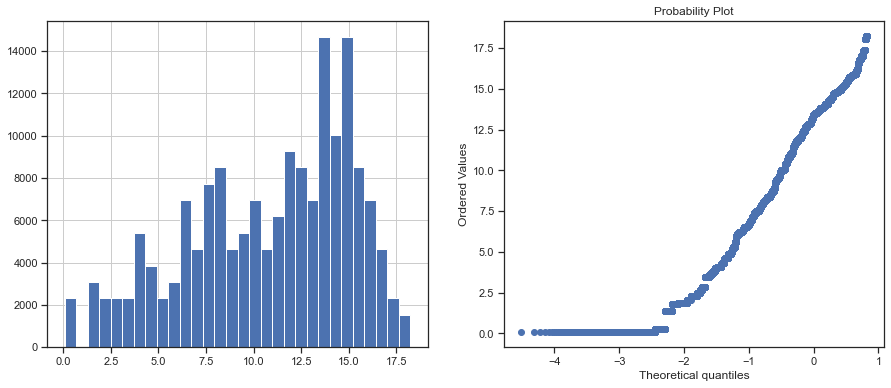

In [27]:
data_de['Lat'] = data_de['Lat']**(2)
diagnostic_plots(data_de, 'Lat')